<a href="https://colab.research.google.com/github/Ridzan12/24001074-18-mrp-hate_speech_tweet-gold/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDONESIAN ABUSIVE AND HATE SPEECH TWITTER TEXT ANALYSIS**

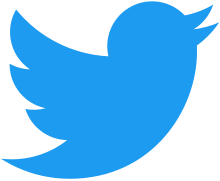








# **DATA DICTIONARY**

* **HS** : Hate speech label
* **Abusive** : Abusive language label
* **Individual** : Hate speech targeted to an individual
* **Group** : Hate speech targeted to a group
* **Religion** : Hate speech related to religion/creed
* **Race** : Hate speech related to race/ethnicity
* **Physical** : Hate speech related to physical/disability
* **Gender** : Hate speech related to gender/sexual orientation
* **Gender** : Hate related to other invective/slander
* **Weak** : Level of Weak hate speech
* **Moderate** : Level of Moderate hate speech
* **Strong** : Level of Strong hate speech

       Dataset by : Muhammad Okky Ibrohim and Indra Budi.
       Kaggle     : https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

# **DATA PREPARATION**


In [108]:
!git clone https://github.com/Ridzan12/24001074-18-mrp-hate_speech_tweet-gold.git

fatal: destination path '24001074-18-mrp-hate_speech_tweet-gold' already exists and is not an empty directory.


## Library

In [109]:
import pandas as pd
import re

# Stemming
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import norm
from scipy.stats import mode
import numpy as np

import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Import Data**

In [110]:
# Import data menggunakan url gdrive
url = 'https://drive.google.com/uc?id=1FN2vpMAHx2-USXYyOq13jFGi18lZoTGo'
url2 = 'https://drive.google.com/uc?id=13TTHFD0wGXmisiP5wHj1WLWvdjubIxOS'
url3 = 'https://drive.google.com/uc?id=1HcpPlu8GqpxkfZdkAeyOW7bPXzv5f0Yl'

# Membaca file dan mengubah link menggunakan ISO-8859-1
df = pd.read_csv(url, encoding='ISO-8859-1')
df_alay = pd.read_csv(url2, encoding='ISO-8859-1')
df_abusive = pd.read_csv(url3, encoding='ISO-8859-1')

# Menampilkan 10 data teratas
df.head(9)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# **DATA CLEANING**

### Cek Duplicate


In [112]:
# Cek duplicate
df.duplicated().sum()

125

In [113]:
# Delete duplicate
df = df.drop_duplicates()

# Cek kembali duplicate
df.duplicated().sum()
print(f"Jumlah duplikat yang tersisa: {df.duplicated().sum()}")

Jumlah duplikat yang tersisa: 0


In [114]:
# Cek total row yang tersisa
df.shape

(13044, 13)

### Cek Missing Values

In [115]:
# Cek missing values
df.isna().sum()/df.shape[0] # Tidak ada missing values

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

## Rename & Remove Column


In [116]:
# Rename kolom
df.rename(columns = {'HS':'Hate_Speech'}, inplace = True)
df.head()

<ipython-input-116-828a4332cb31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'HS':'Hate_Speech'}, inplace = True)


,Tweet,Hate_Speech,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [117]:
# Hapus 'HS_' dan kolom 'Other' agar kolom lebih bersih
df.columns = df.columns.str.replace('HS_', '')
df = df.drop('Other', axis=1)
df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,1,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 13168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet        13044 non-null  object
 1   Hate_Speech  13044 non-null  int64 
 2   Abusive      13044 non-null  int64 
 3   Individual   13044 non-null  int64 
 4   Group        13044 non-null  int64 
 5   Religion     13044 non-null  int64 
 6   Race         13044 non-null  int64 
 7   Physical     13044 non-null  int64 
 8   Gender       13044 non-null  int64 
 9   Weak         13044 non-null  int64 
 10  Moderate     13044 non-null  int64 
 11  Strong       13044 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.3+ MB


## Text Manipulation


### Lower Case Kolom Tweet


In [119]:
# Lowercase semua huruf
def lowercase_text_with_regex(text):
    return re.sub(r'.', lambda match: match.group(0).lower(), text)

In [120]:
df['Tweet'] = df['Tweet'].apply(lowercase_text_with_regex)

In [121]:
df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,0,0
1,rt user: user siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0
2,"41. kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0
3,user user aku itu aku\n\nku tau matamu sipit t...,0,0,0,0,0,0,0,0,0,0,0
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,1,0


### Hapus Karakter Yang Tidak Berhubungan


In [122]:
# Bersihkan Pattern yang error
pattern = r"\buser\b|\brt\b|\n|;|\(--!\)|-|:|\\|:\)|:\(|ð|\'|'\s|,\s*,|\"n\"|\d+\.\s|URL|"
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(pattern, '', x))

df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0
1,siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0
3,aku itu akunnku tau matamu sipit tapi diliat...,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0


**Di bawah ini adalah text Pattern yang error di dalam kolom Tweet**

*   **'\buser\b' :** Menghapus kata "user" .
*   **'\brt\b' :** Menghapus kata "rt" yang sering digunakan untuk menandakan retweet.
*   **'\n' :** Menghapus karakter baris baru (newline).
*   **';' :** Menghapus karakter titik koma.
*   **'\(--!\)'**: Menghapus rangkaian karakter " (--!)" termasuk tanda kurung.
*   **'-' :** Menghapus tanda strip.
*   **':' :** Menghapus tanda titik dua.
*   **'\\' :** Menghapus backslash.
*   **':\)' :** Menghapus emotikon senyum.
*   **':\(' :** Menghapus emotikon sedih yang dibuat dengan titik dua dan tanda kurung kiri.
*   **'ð' :** Menghapus karakter "ð".
*   **\' :** Menghapus tanda kutip tunggal.
*   **'\s :** Menghapus tanda kutip tunggal yang diikuti oleh spasi.
*   **',\s*,' :** Menghapus koma yang diikuti oleh spasi, lalu diikuti koma lagi.
*   **'\"n\"' :** Menghapus string "n" yang diapit oleh tanda kutip ganda.
*   **'\d+\.\s' :** Menghapus angka yang diikuti oleh titik dan spasi(sering digunakan untuk menghapus penomoran dalam teks).
*   **'URL' :** Menghapus kata "URL", yang biasanya digunakan untuk menggantikan link web dalam teks.





### Hapus String Emoji

In [123]:
# Bersihkan String Emoji  (\xf0\x9f\x98\x84\xf0\x9f\x98\x84\xf0\x9f\x98\x84,...)
pattern_unicode_hex = r'(x[a-f0-9]{2})+'
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(pattern_unicode_hex, '', x))

df.head(50)

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0
1,siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0
3,aku itu akunnku tau matamu sipit tapi diliat...,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0
5,ya bani taplak dkk,1,1,0,1,0,0,0,0,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0
7,gue baru aja kelar rewatch aldnoah zero!!! pal...,0,1,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0
9,enak lg klo smbil ngewe,0,1,0,0,0,0,0,0,0,0,0


### Synonim Kata

In [124]:
# Membuat kamus koreksi typo dari data kamusalay
dict_kata = dict(zip(df_alay.iloc[:, 0], df_alay.iloc[:, 1]))

# Fungsi untuk mengganti kata typo berdasarkan kamus koreksi
def ganti_typo(teks):
    kata_terpisah = teks.split()
    kata_terganti = [dict_kata.get(kata, kata) for kata in kata_terpisah]
    return ' '.join(kata_terganti)

# Mengganti typo di kolom 'Tweet'
df['Tweet'] = df['Tweet'].apply(ganti_typo)

# Menampilkan beberapa baris pertama dari data yang sudah diproses untuk verifikasi
df.head(50)

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0
1,siapa yang telat memberi tau elu?edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0
3,aku itu akunnku tau matamu sipit tapi dilihat ...,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan,1,1,0,1,0,0,0,0,0,1,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai rewatch aldnoah zero!!! ...,0,1,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0


# **EDA**


## Univariate Analysis

In [125]:
# Buat Length Total Character dan Total Word
df['Total_Char'] = df.Tweet.apply(len)
df['Total_Word'] = df.Tweet.apply(lambda sent: len(sent.split()))

In [126]:
df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong,Total_Char,Total_Word
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0,140,25
1,siapa yang telat memberi tau elu?edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0,106,18
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0,252,37
3,aku itu akunnku tau matamu sipit tapi dilihat ...,0,0,0,0,0,0,0,0,0,0,0,63,12
4,kaum cebong kafir sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0,76,12


#### Total_Char

##### Quartile dan IQR

In [127]:
# Cari nilai minimum
p0 = df.Total_Char.min()

# Cari nilai maksimum
p100 = df.Total_Char.max()

# Cari Quartile 1
q1 = df.Total_Char.quantile(0.25)

# Cari Quartile 2
q2 = df.Total_Char.quantile(0.5)

# Cari Quartile 3
q3 = df.Total_Char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'Total_Char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'Total_Char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'Total_Char': -92.0
Nilai minimum 0
Tidak ada outlier dari sisi batas bawah

Batas Atas 'Total_Char': 300.0
Nilai maksimum 433
Ada outlier dari sisi batas atas


##### Delete Outlier

In [128]:
# Menghitung statistik yang diperlukan
p0 = df['Total_Char'].min()
p100 = df['Total_Char'].max()
q1 = df['Total_Char'].quantile(0.25)
q3 = df['Total_Char'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

# Menghapus nilai outlier di sisi atas
df = df[df['Total_Char'] <= upper_limit]

In [129]:
# Total rows setelah outlier dihapus
df.shape

(12966, 14)

##### Histogram

In [130]:
# Menghitung mode dan median
mode_result = mode(df['Total_Char'])
mode_value = mode_result.mode[0] if hasattr(mode_result.mode, "__len__") else mode_result.mode
median_value = df['Total_Char'].median()

In [131]:
# Menampilkan versi scipy yang digunakan dan nilai mode serta median
scipy_version = scipy.__version__
(scipy_version, mode_value, median_value)

('1.11.4', 57, 97.5)

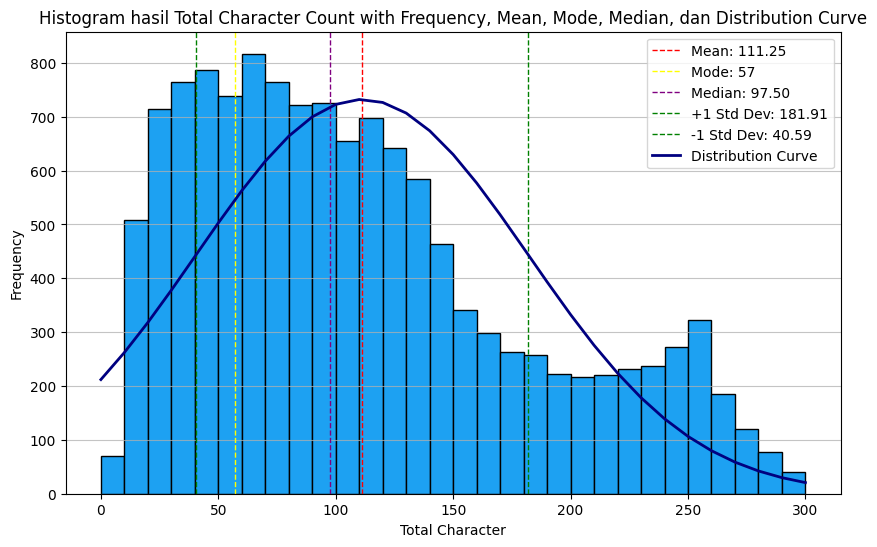

In [132]:
# Menghitung mean dan standar deviasi untuk data 'Total_Char' lagi
mean_value = df['Total_Char'].mean()
std_dev = df['Total_Char'].std()

# Menghitung parameter untuk normal distribution
mu, std = norm.fit(df['Total_Char'])

# Membuat histogram dengan frekuensi dan menambahkan garis untuk mean, mode, median, dan kurva distribusi normal
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Total_Char'], bins=30, color='#1DA1F2', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(mode_value, color='yellow', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_value - std_dev:.2f}')

# Menghitung nilai y untuk kurva distribusi normal
y = norm.pdf(bins, mu, std) * len(df['Total_Char']) * np.diff(bins)[0]
plt.plot(bins, y, color='navy', linewidth=2, label='Distribution Curve')

plt.title('Histogram hasil Total Character Count with Frequency, Mean, Mode, Median, dan Distribution Curve')
plt.xlabel('Total Character')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

**Skewness**

Positif Skew menandakan, ada sedikit tweet dengan total karakter yang banyak.

**Central Tendency**

* **Mean**
  
  Rata-rata jumlah karakter lebih tinggi daripada modus, menandakan adanya skew ke kanan.

* **Median**
  
  Nilai tengah distribusi berada di antara mean dan modus, juga mengindikasikan distribusi yang skew ke kanan.

* **Variabilitas**

 Standar deviasi menunjukkan bahwa ada variasi yang signifikan dalam jumlah karakter. Data lebih tersebar di atas mean daripada di bawahnya, yang juga menunjukkan skewness ke kanan.

**Kesimpulan**

Histogram memberikan pandangan yang jelas bahwa kebanyakan teks cenderung pendek, dengan beberapa tweet yang sangat panjang.


#### Total Word

##### Quartile dan IQR

In [133]:
# Cari nilai minimum
p0 = df.Total_Word.min()

# Cari nilai maksimum
p100 = df.Total_Word.max()

# Cari Quartile 1
q1 = df.Total_Word.quantile(0.25)

# Cari Quartile 2
q2 = df.Total_Word.quantile(0.5)

# Cari Quartile 3
q3 = df.Total_Word.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'Total_Word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'Total_Word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'Total_Word': -13.0
Nilai minimum 0
Tidak ada outlier dari sisi batas bawah

Batas Atas 'Total_Word': 43.0
Nilai maksimum 52
Ada outlier dari sisi batas atas


##### Delete Outlier

In [134]:
# Menghitung statistik yang diperlukan
p0 = df['Total_Word'].min()
p100 = df['Total_Word'].max()
q1 = df['Total_Word'].quantile(0.25)
q3 = df['Total_Word'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

# Menghapus nilai outlier di sisi atas
df = df[df['Total_Word'] <= upper_limit]

In [135]:
# Total rows setelah outlier Total_Word dihapus
df.shape[0]

12865

##### Histogram

In [136]:
# Menghitung mode dan median
mode_result = mode(df['Total_Word'])
mode_value = mode_result.mode[0] if hasattr(mode_result.mode, "__len__") else mode_result.mode
median_value = df['Total_Word'].median()

In [137]:
# Menampilkan versi scipy yang digunakan dan nilai mode serta median
scipy_version = scipy.__version__
(scipy_version, mode_value, median_value)

('1.11.4', 11, 14.0)

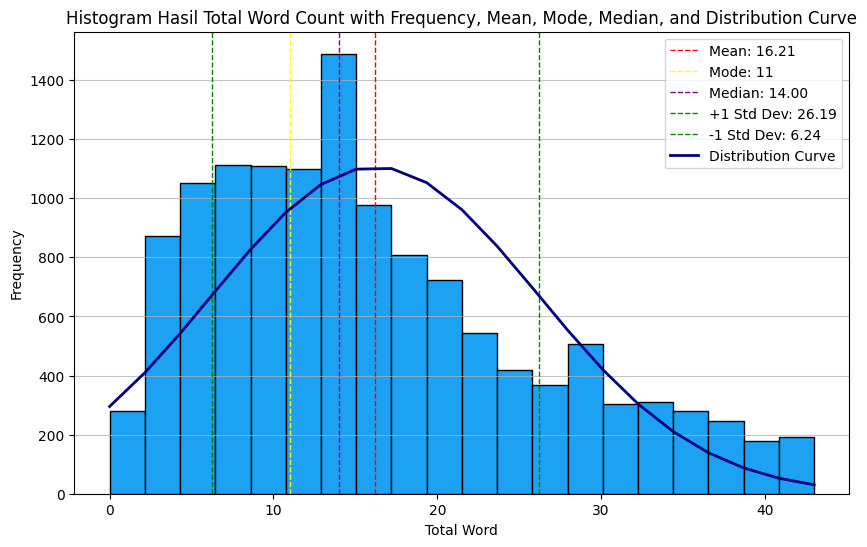

In [138]:
# Menghitung mean dan standar deviasi untuk data 'Total_Word' lagi
mean_value = df['Total_Word'].mean()
std_dev = df['Total_Word'].std()

# Menghitung parameter untuk normal distribution
mu, std = norm.fit(df['Total_Word'])

# Membuat histogram dengan frekuensi dan menambahkan garis untuk mean, mode, median, dan kurva distribusi normal
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Total_Word'], bins=20, color='#1DA1F2', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(mode_value, color='yellow', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value}')
plt.axvline(median_value, color='purple', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_value - std_dev:.2f}')

# Menghitung nilai y untuk kurva distribusi normal
y = norm.pdf(bins, mu, std) * len(df['Total_Word']) * np.diff(bins)[0]
plt.plot(bins, y, color='navy', linewidth=2, label='Distribution Curve')

plt.title('Histogram Hasil Total Word Count with Frequency, Mean, Mode, Median, and Distribution Curve')
plt.xlabel('Total Word')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

**Skewness**

Positif Skew menandakan, ada sedikit tweet dengan total Word yang banyak.

**Central Tendency**

* **Rata-rata**

Diwakili oleh garis merah, nilai rata-rata lebih tinggi daripada modus, yang juga mendukung bukti kemencengan positif.

* **Mode**

 Mode lebih dekat dengan median, ini menandakan skew positif yang tidak terlalu ekstrem

* **Median**

 Median berada di antara modus dan rata-rata, menunjukkan bahwa separuh dari data memiliki jumlah kata yang kurang dari atau sama dengan median.

**Kesimpulan**


Histogram menunjukkan bahwa kebanyakan teks memiliki jumlah kata yang relatif sedikit, dengan beberapa teks memiliki jumlah kata yang jauh lebih banyak.


### Stemming

In [139]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stem_text(text):
#    return stemmer.stem(text)

In [140]:
# df['Tweet_Stemmed'] = df['Tweet'].apply(stem_text)

In [141]:
#df.head()

In [142]:
#!gdown 'https://drive.google.com/uc?id=1x3LFxviPrjIDFcqE5DMzCs6f6NNRO7nQ' -O data.csv

In [143]:
# df.to_csv('stemmed_data.csv', index=False)

# # Download the file (in Google Colab)
# from google.colab import files
# files.download('stemmed_data.csv')

In [144]:
# # Import data menggunakan url gdrive
# url = 'https://drive.google.com/uc?id=14OsQl2UrMZZ7CG5zOSNhi9mPC3hTlvgp'

# # Membaca file dan mengubah link menggunakan ISO-8859-1
# df_stm = pd.read_csv(url, encoding='ISO-8859-1')

# # Menampilkan 10 data teratas
# df_stm.head(10)

### WordCloud


##### Stop Words

In [145]:
factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()
len(list_stopword)

126

In [146]:
print (list_stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [147]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df['Tweet_STP'] = df['Tweet'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong,Total_Char,Total_Word,Tweet_STP
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0,140,25,semua cowok berusaha melacak perhatian gue. ...
1,siapa yang telat memberi tau elu?edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0,106,18,siapa telat memberi tau elu?edan sarap gue be...
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0,252,37,"kadang aku berfikir, aku tetap percaya tuhan..."
3,aku itu akunnku tau matamu sipit tapi dilihat ...,0,0,0,0,0,0,0,0,0,0,0,63,12,aku akunnku tau matamu sipit dilihat mana aku
4,kaum cebong kafir sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0,76,12,kaum cebong kafir kelihatan dongoknya awal t...


##### Abusive di kolom Tweet


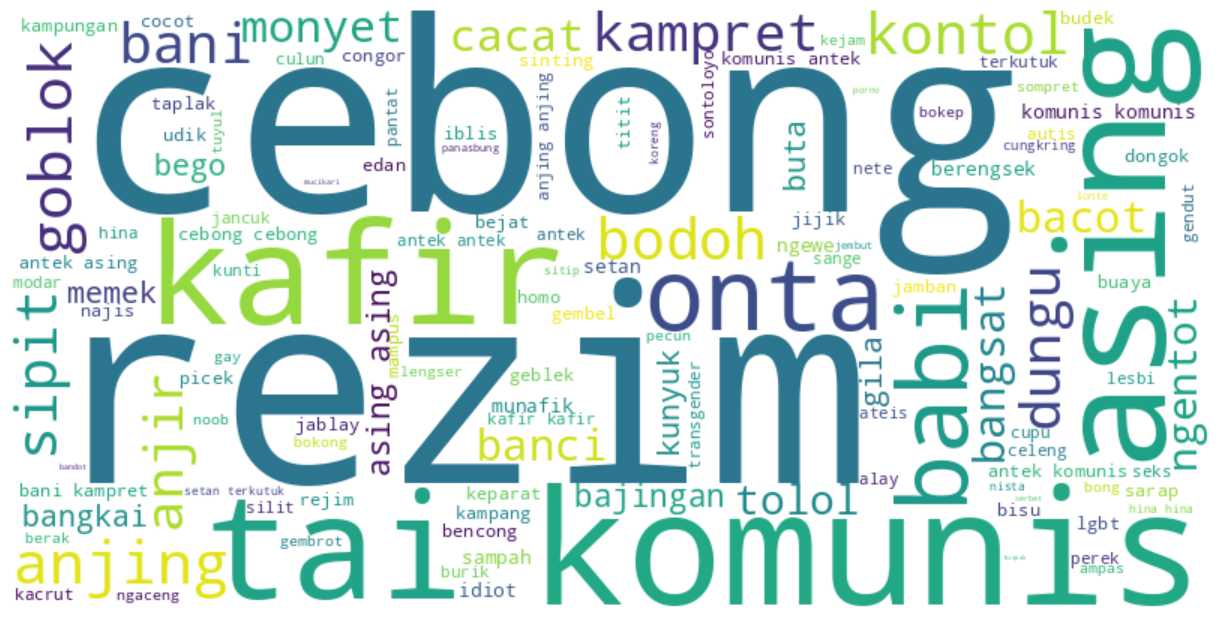

In [148]:
# Worcloud
abusive_words_set = set(df_abusive['ABUSIVE'])

def filter_in_abusive_words(text):
    return ' '.join(word for word in text.split() if word.lower() in abusive_words_set)


df['Abusive_Words'] = df['Tweet_STP'].apply(filter_in_abusive_words)


abusive_text = ' '.join(df['Abusive_Words'])
wordcloud_abusive = WordCloud(width=800, height=400, background_color='white').generate(abusive_text)


plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud_abusive, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

##### Group


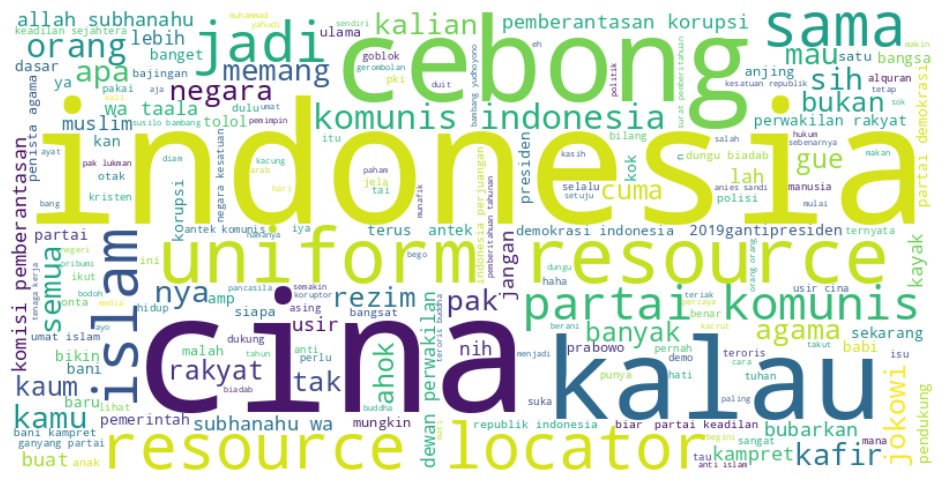

In [149]:
#filter Worldcloud
filtered_df = df[df['Group'] == 1]


combined_tweets = ' '.join(filtered_df['Tweet_STP'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tweets)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

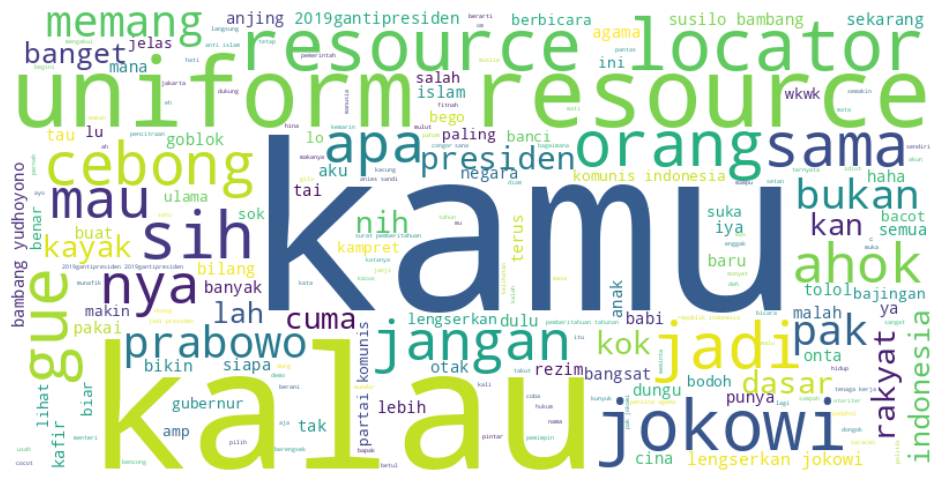

In [150]:
#filter Worldcloud
filtered_df = df[df['Individual'] == 1]


combined_tweets = ' '.join(filtered_df['Tweet_STP'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tweets)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Gender

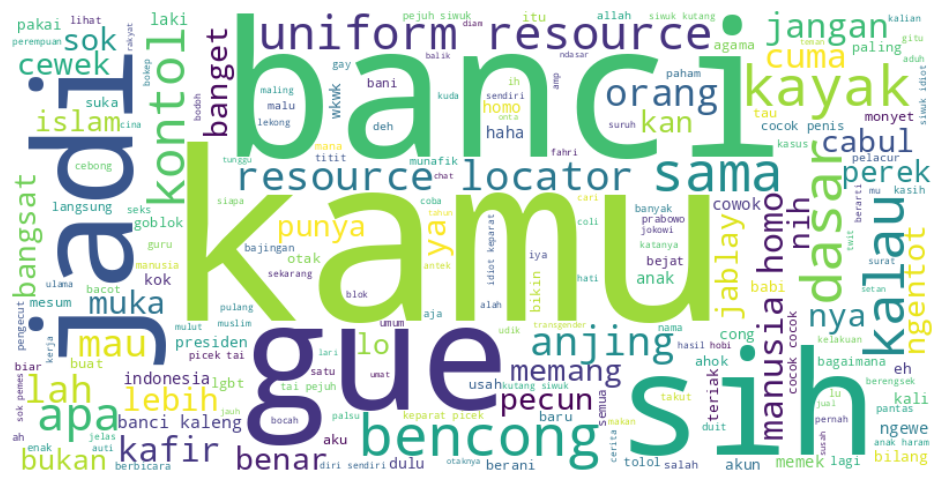

In [151]:
#filter Worldcloud
filtered_df = df[df['Gender'] == 1]


combined_tweets = ' '.join(filtered_df['Tweet_STP'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tweets)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [152]:
df.head()

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong,Total_Char,Total_Word,Tweet_STP,Abusive_Words
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0,140,25,semua cowok berusaha melacak perhatian gue. ...,bego
1,siapa yang telat memberi tau elu?edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0,106,18,siapa telat memberi tau elu?edan sarap gue be...,sarap
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0,252,37,"kadang aku berfikir, aku tetap percaya tuhan...",
3,aku itu akunnku tau matamu sipit tapi dilihat ...,0,0,0,0,0,0,0,0,0,0,0,63,12,aku akunnku tau matamu sipit dilihat mana aku,sipit
4,kaum cebong kafir sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0,76,12,kaum cebong kafir kelihatan dongoknya awal t...,cebong kafir dungu


## Bivariate Analysis

### Scatter Plot

#### Total_Char vs Total_Word

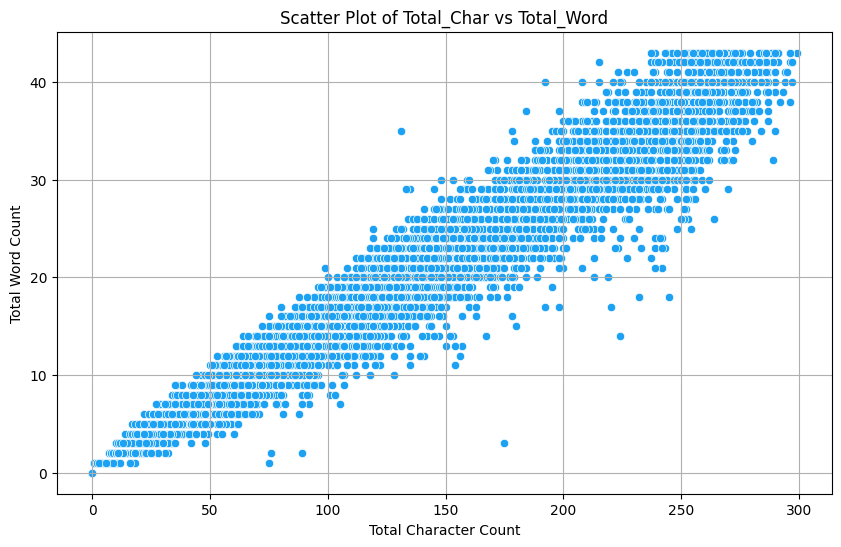

In [153]:
# Scatter Plot Total_Char vs Total_word
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Total_Char'], y=df['Total_Word'], color='#1DA1F2')
plt.title('Scatter Plot of Total_Char vs Total_Word')
plt.xlabel('Total Character Count')
plt.ylabel('Total Word Count')
plt.grid(True)
plt.show()

***
**INSIGHT**
***
Plot ini menunjukkan hubungan antara Total_Char dan Total_Word dalam tweet. Kita dapat melihat pola umum bahwa saat Total_Char meningkat, Total_Word juga cenderung meningkat, yang masuk akal karena lebih banyak karakter biasanya berarti lebih banyak kata.
***

## Multivariate Analysis

### Correlation Heatmap

In [154]:
hs_columns = df.loc[:, 'Hate_Speech':'Strong']

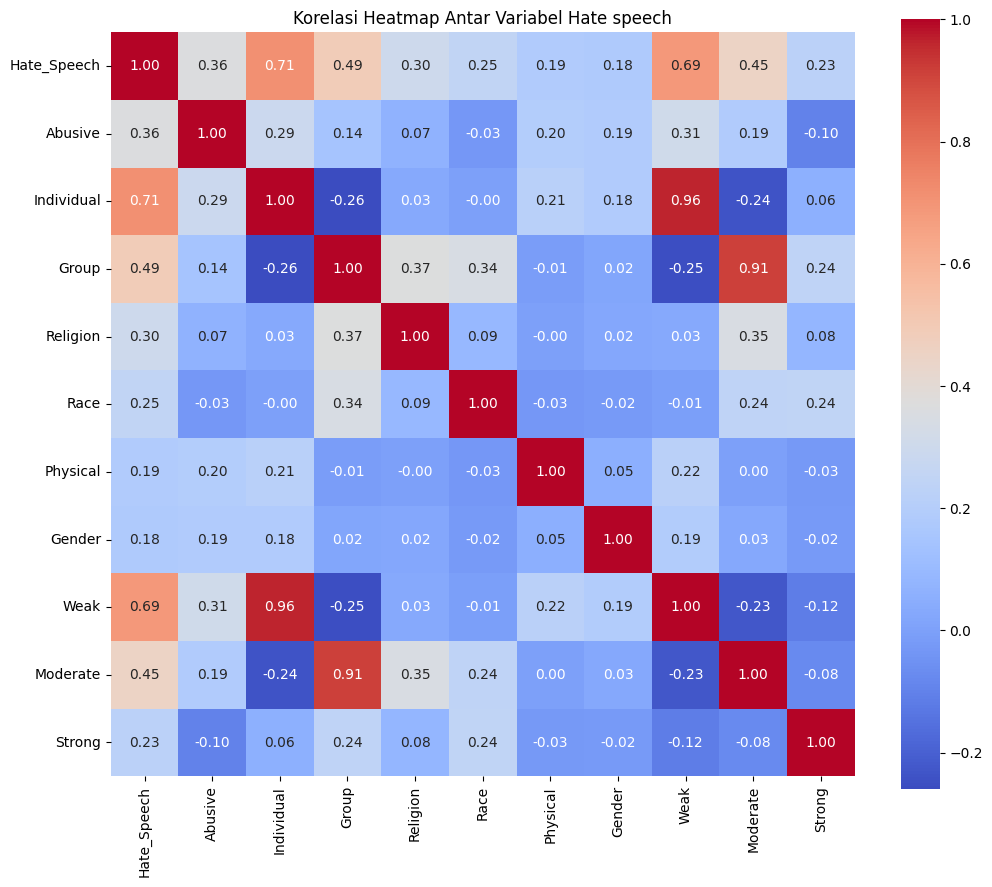

In [155]:
# Menghitung korelasi Pearson antara kolom-kolom
hs_correlation = hs_columns.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(hs_correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korelasi Heatmap Antar Variabel Hate speech')
plt.show()

***
**POSITIVE VALUE (RED)**
***
* **Individual dan Weak (0.96)**

  Hate Speech yang ditujukan kepada individu termasuk dalam kategori Hate Speech yang lemah

* **Group dan Moderate (0.92)**

  kasus-kasus Hate Speech yang ditujukan kepada kelompok atau grup cenderung  termasuk dalam kategorikan tingkat Hate Speech moderat/lumayan kejam.

***
**NEGATIVE VALUE (DARK BLUE)**
***

* **Individual dan Group**

  Semakin banyak Hate speech yang ditujukan kepada individual, ada kecenderungan lebih rendah dibandingkan Hate Specch pada group.

* **Group dan Weak**

  Semakin banyak Hate Speech pada group, belum tentu Hatespeech pada group berada di level Hate Speech Weak

***
**KESIMPULAN**
***

* Banyak kasus hate speech yang ditujukan kepada individu biasanya dianggap tidak terlalu keras atau serius.
* Kasus Hate Speech Group dianggap lumayan Moderate/lumayan kejam.
* Jika seseorang dihina secara Individu, itu jarang juga dianggap sebagai serangan terhadap kelompok/Group.
* Hate speech yang mengincar sebuah grup atau kelompok biasanya dianggap ringan/lemah.

***

  



In [156]:
df.head(200)

,Tweet,Hate_Speech,Abusive,Individual,Group,Religion,Race,Physical,Gender,Weak,Moderate,Strong,Total_Char,Total_Word,Tweet_STP,Abusive_Words
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,0,0,140,25,semua cowok berusaha melacak perhatian gue. ...,bego
1,siapa yang telat memberi tau elu?edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0,106,18,siapa telat memberi tau elu?edan sarap gue be...,sarap
2,"kadang aku berfikir, kenapa aku tetap percaya ...",0,0,0,0,0,0,0,0,0,0,0,252,37,"kadang aku berfikir, aku tetap percaya tuhan...",
3,aku itu akunnku tau matamu sipit tapi dilihat ...,0,0,0,0,0,0,0,0,0,0,0,63,12,aku akunnku tau matamu sipit dilihat mana aku,sipit
4,kaum cebong kafir sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,1,0,76,12,kaum cebong kafir kelihatan dongoknya awal t...,cebong kafir dungu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,apa sih tai baru begitu doang belaganya sudah ...,1,1,1,0,0,0,0,0,1,0,0,152,25,apa sih tai baru doang belaganya selangit. ...,tai
200,celeng kangen gue iya,0,1,0,0,0,0,0,0,0,0,0,21,4,celeng kangen gue iya,celeng
201,"#teranginegeri dengan budaya , yuk pada mengun...",0,0,0,0,0,0,0,0,0,0,0,127,16,"#teranginegeri budaya , yuk mengunjungi pur...",
202,"presiden itu punya dana taktis, dia bisa mengg...",0,0,0,0,0,0,0,0,0,0,0,277,39,"presiden punya dana taktis, menggunakan ke...",
